<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

Let us classify handwritten digits using 
1. A simple NN which has only input and output layers. 
2. NN with one hidden layer.
3. NN with two hidden layers.

and see how the performance of the model improves

<img src="Figures/MNIST-Handwritten digits.png" height=450 width=450/>

#### TensorFlow Installation

In [362]:
#!pip install tensorflow

In [363]:
import tensorflow as tf

In [364]:
print(tf.version.VERSION)

2.9.1


#### Import the necessary libraries

In [365]:
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [377]:
K.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [378]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### Explore the dataset

Keras Handwritten digit MNIST dataset

<img src="Figures/dataset.png" height=450 width=450 />

In [379]:
len(X_train)

60000

In [380]:
len(X_test)

10000

In [381]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='Figures/pixel.png' />

In [382]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

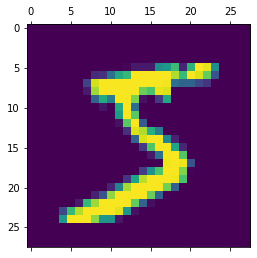

In [383]:
plt.matshow(X_train[0])

In [384]:
y_train[0]
# Label for the above input image

5

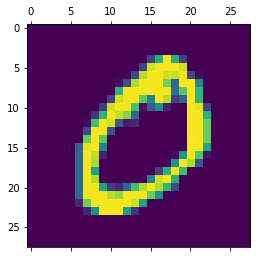

In [385]:
plt.matshow(X_train[1])

In [386]:
y_train[1]

0

In [387]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Flattening

In [388]:
X_train.shape

(60000, 28, 28)

In [389]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [390]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [391]:
X_train_flattened.shape

(60000, 784)

In [392]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [393]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Normalize the input dataset

In [394]:
X_train_normalized = X_train_flattened / 255

In [395]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [396]:
X_test_normalized = X_test_flattened / 255

### NN model with one hidden layer

<img src="Figures/model2.png" height=400 width=400 />

###### Model configuration

In [398]:
model = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')    
])

##### Model summary

In [399]:
model.summary()

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 64)                50240     
                                                                 
 dense_189 (Dense)           (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Layer details

In [400]:
model.layers

In [401]:
len(model.layers)

2

In [402]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [403]:
model.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=10000)

Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 2.1397 - accuracy: 0.2593
Epoch 2/100
6/6 [==============================] - 0s 35ms/step - loss: 1.6485 - accuracy: 0.5891
Epoch 3/100
6/6 [==============================] - 0s 36ms/step - loss: 1.2389 - accuracy: 0.7230
Epoch 4/100
6/6 [==============================] - 0s 34ms/step - loss: 0.9414 - accuracy: 0.7922
Epoch 5/100
6/6 [==============================] - 0s 34ms/step - loss: 0.7460 - accuracy: 0.8233
Epoch 6/100
6/6 [==============================] - 0s 36ms/step - loss: 0.6198 - accuracy: 0.8475
Epoch 7/100
6/6 [==============================] - 0s 33ms/step - loss: 0.5375 - accuracy: 0.8653
Epoch 8/100
6/6 [==============================] - 0s 34ms/step - loss: 0.4818 - accuracy: 0.8765
Epoch 9/100
6/6 [==============================] - 0s 34ms/step - loss: 0.4418 - accuracy: 0.8841
Epoch 10/100
6/6 [==============================] - 0s 39ms/step - loss: 0.4120 - accuracy: 0.8911
Epoch 11/100
6/6 [=

##### Printing the weights

Getting weights and bias values after the training stage

In [404]:
original_weights = model.get_weights()
# convert list to array
weights = np.array(original_weights)
weights

<ipython-input-404-4f8fb3d8cc7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(original_weights)


array([array([[ 0.03313845, -0.05806822, -0.06300296, ..., -0.0628145 ,
                0.00584284, -0.03571126],
              [ 0.05299837, -0.07606329,  0.07917354, ...,  0.02267645,
                0.08102488,  0.07239794],
              [-0.03857384, -0.04556585, -0.01038469, ...,  0.00685869,
                0.02624539, -0.0532121 ],
              ...,
              [ 0.05094124, -0.07877113, -0.08311564, ..., -0.02148538,
               -0.07875767,  0.06038708],
              [-0.04329074, -0.01596504,  0.08128626, ..., -0.03404623,
                0.04891136,  0.08062259],
              [ 0.05455414, -0.0238579 , -0.05515278, ..., -0.07196478,
                0.08281463,  0.02076405]], dtype=float32)              ,
       array([ 0.05232109,  0.08736482, -0.08231933,  0.01211582,  0.00458064,
               0.03812985,  0.16841695,  0.01041508,  0.02917773,  0.04843887,
               0.20593856,  0.0232954 ,  0.11044628, -0.03851435, -0.00929046,
               0.02504925,  0

In [405]:
weights.shape

(4,)

In [406]:
# weights of first layer
weights[0].shape

(784, 64)

In [407]:
# bias of first layer
weights[1].shape

(64,)

In [408]:
# weights of second layer
weights[2].shape

(64, 10)

In [409]:
# bias of second layer
weights[3].shape

(10,)

In [410]:
weights[0] 

array([[ 0.03313845, -0.05806822, -0.06300296, ..., -0.0628145 ,
         0.00584284, -0.03571126],
       [ 0.05299837, -0.07606329,  0.07917354, ...,  0.02267645,
         0.08102488,  0.07239794],
       [-0.03857384, -0.04556585, -0.01038469, ...,  0.00685869,
         0.02624539, -0.0532121 ],
       ...,
       [ 0.05094124, -0.07877113, -0.08311564, ..., -0.02148538,
        -0.07875767,  0.06038708],
       [-0.04329074, -0.01596504,  0.08128626, ..., -0.03404623,
         0.04891136,  0.08062259],
       [ 0.05455414, -0.0238579 , -0.05515278, ..., -0.07196478,
         0.08281463,  0.02076405]], dtype=float32)

In [411]:
model.layers[0].get_weights()
# displays the weights and biases of first layer

[array([[ 0.03313845, -0.05806822, -0.06300296, ..., -0.0628145 ,
          0.00584284, -0.03571126],
        [ 0.05299837, -0.07606329,  0.07917354, ...,  0.02267645,
          0.08102488,  0.07239794],
        [-0.03857384, -0.04556585, -0.01038469, ...,  0.00685869,
          0.02624539, -0.0532121 ],
        ...,
        [ 0.05094124, -0.07877113, -0.08311564, ..., -0.02148538,
         -0.07875767,  0.06038708],
        [-0.04329074, -0.01596504,  0.08128626, ..., -0.03404623,
          0.04891136,  0.08062259],
        [ 0.05455414, -0.0238579 , -0.05515278, ..., -0.07196478,
          0.08281463,  0.02076405]], dtype=float32),
 array([ 0.05232109,  0.08736482, -0.08231933,  0.01211582,  0.00458064,
         0.03812985,  0.16841695,  0.01041508,  0.02917773,  0.04843887,
         0.20593856,  0.0232954 ,  0.11044628, -0.03851435, -0.00929046,
         0.02504925,  0.04867984, -0.0160343 ,  0.0625328 ,  0.11035717,
         0.02140745, -0.0450017 ,  0.05870792,  0.0780674 ,  0.050

In [412]:
model.layers[0].get_weights()[0]
# Displays the weights of first layer

array([[ 0.03313845, -0.05806822, -0.06300296, ..., -0.0628145 ,
         0.00584284, -0.03571126],
       [ 0.05299837, -0.07606329,  0.07917354, ...,  0.02267645,
         0.08102488,  0.07239794],
       [-0.03857384, -0.04556585, -0.01038469, ...,  0.00685869,
         0.02624539, -0.0532121 ],
       ...,
       [ 0.05094124, -0.07877113, -0.08311564, ..., -0.02148538,
        -0.07875767,  0.06038708],
       [-0.04329074, -0.01596504,  0.08128626, ..., -0.03404623,
         0.04891136,  0.08062259],
       [ 0.05455414, -0.0238579 , -0.05515278, ..., -0.07196478,
         0.08281463,  0.02076405]], dtype=float32)

In [413]:
model.layers[0].get_weights()[1]
# Displays the biases of first layer

array([ 0.05232109,  0.08736482, -0.08231933,  0.01211582,  0.00458064,
        0.03812985,  0.16841695,  0.01041508,  0.02917773,  0.04843887,
        0.20593856,  0.0232954 ,  0.11044628, -0.03851435, -0.00929046,
        0.02504925,  0.04867984, -0.0160343 ,  0.0625328 ,  0.11035717,
        0.02140745, -0.0450017 ,  0.05870792,  0.0780674 ,  0.05065313,
        0.05217264,  0.03214836,  0.05520001, -0.0577762 ,  0.12832502,
        0.0573783 ,  0.20155184, -0.08349374,  0.08398577, -0.02551393,
       -0.04493155,  0.06416006, -0.00933366,  0.05196128, -0.03291681,
       -0.03734412,  0.02055074,  0.01338655, -0.12397888,  0.03296715,
       -0.0834765 ,  0.06671446, -0.04816326, -0.04621329,  0.00470987,
       -0.0578814 ,  0.0647288 , -0.01923519,  0.04551282,  0.03181357,
       -0.06914335,  0.06330365,  0.04253759,  0.08764268, -0.00964639,
        0.00395405,  0.02047261,  0.10625917,  0.09375841], dtype=float32)

In [414]:
model.layers[1].get_weights()
# displays the weights and biases of second layer

[array([[-3.09624046e-01,  8.24916884e-02,  8.22237357e-02,
         -2.28904963e-01,  2.50713557e-01, -6.75480142e-02,
          3.57565403e-01,  1.45755351e-01, -1.86024621e-01,
          2.26056114e-01],
        [-4.49724555e-01,  3.87801588e-01, -4.49951231e-01,
         -5.56913972e-01,  8.77468288e-03,  3.04637790e-01,
          2.69348264e-01, -1.41604751e-01, -3.62319261e-01,
          2.04117909e-01],
        [ 3.20476681e-01,  1.19318068e-01,  2.64397532e-01,
         -2.46136889e-01,  8.43825266e-02, -5.91564596e-01,
          2.25835696e-01, -3.00781369e-01, -4.47164267e-01,
          4.01692390e-01],
        [ 5.14119640e-02,  3.89341116e-01, -3.45448226e-01,
          2.92563051e-01,  2.98921555e-01, -6.05802000e-01,
         -7.25607872e-02,  2.73730487e-01, -1.22641370e-01,
         -2.16751724e-01],
        [ 4.73080009e-01, -2.35821962e-01, -4.90836501e-02,
         -2.57490762e-02,  3.14414829e-01, -1.11421354e-01,
          1.56887040e-01,  3.03242445e-01, -5.985487

##### Storing and retrieving the weights

In [422]:
model.save_weights('my_model_weights.h5')
recovered_model = model.load_weights('my_model_weights.h5')
# model.get_weights()

##### Storing and retrieving the models

In [423]:
model.save('model.h5')
loaded_model = keras.models.load_model('model.h5')

In [424]:
# cloning the models
model_cloned = keras.models.clone_model(model)
new_weights = model_cloned.get_weights()

##### HM model

In [425]:
def get_model(): 
    model_hm = keras.Sequential([
        # input layer 784 neurons to first hidden layer with 64 neurons
        keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
        # first hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # second hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # Output layer with 10 neurons
        keras.layers.Dense(10, activation='sigmoid')
    ])
    model_hm.compile(
        optimizer = 'SGD',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model_hm

In [585]:
class CustomCallback(keras.callbacks.Callback): 
    iteration = 0
    initial_weights = 0
    previous_weights = 0
    
    def on_train_begin(self, logs=None):
        self.initial_weights = model_hm.get_weights() 
        self.initial_weights = np.array(self.initial_weights,dtype=object)
        self.previous_weights = self.initial_weights
        #print("\nThe initial weights are: \n",self.initial_weights)
        #print("\nTheir shape :", self.initial_weights.shape) 
    
    def on_train_batch_end(self, epoch, logs=None): 
        counter = 0
        num_layers = len(model_hm.layers) 
        #print("\n Number of layers :",num_layers)
        #print("\nIteration number :",self.iteration)
        current_weights = model_hm.get_weights()
        current_weights = np.array(current_weights,dtype=object)
        call = np.vectorize(apply_gm)
        #print("\nThe previous weights are: \n",self.previous_weights)
        
        for i in range(num_layers):  
            #current_weights[counter] = 2 * (self.previous_weights[counter]  * current_weights[counter]) / (self.previous_weights[counter]  + current_weights[counter])
            #current_weights[counter] = (self.previous_weights[counter]  + current_weights[counter]) / 2
            #current_weights[counter] = self.previous_weights[counter]  
            #current_weights[counter] = 1.1 * self.previous_weights[counter]
            #if self.iteration > 5:
            #call = np.vectorize(apply_hm)
            current_weights[counter] = call(self.previous_weights[counter], current_weights[counter])
            counter = counter + 2
            
        updated = current_weights.tolist()        
        #print("\nThe current weights are: \n",current_weights)
        model_hm.set_weights(updated)
        self.previous_weights = current_weights
        self.iteration = self.iteration + 1 
        #print("\nThe weights are: \n",updated) 
        
    #def on_epoch_end(self, epoch, logs=None): 
        #num_layers = len(model_hm.layers)  
        #print("epoch end")
        #for i in range(num_layers):
        #weights = model_hm.layers[i].get_weights()[0] 
        #print("Layer number :",i)
        #print("The weights are :", weights) 
        #print("Their shape :", weights.shape) 
        
    def apply_gm(v1,v2): 
    
        if v1==0 or v2==0:
            return v2

        elif v1>0 and v2>0:
            hm = 2*v1*v2/(v1+v2)
            min1 = min(v1,v2)
            diff = abs(hm-min1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff

        elif v1<0 and v2<0:
            hm = 2*v1*v2/(v1+v2)
            max1 = max(v1,v2)
            diff = abs(hm-max1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        else:
            return v2    

In [604]:
model_hm = get_model()
model_hm.fit(X_train_normalized, y_train, epochs = 300, verbose=1, callbacks=[CustomCallback()], batch_size=128) 

Epoch 1/300
469/469 [==============================] - 22s 47ms/step - loss: 1.0128 - accuracy: 0.7540
Epoch 2/300
469/469 [==============================] - 22s 46ms/step - loss: 0.4794 - accuracy: 0.8745
Epoch 3/300
469/469 [==============================] - 23s 48ms/step - loss: 0.3970 - accuracy: 0.8908
Epoch 4/300
469/469 [==============================] - 22s 47ms/step - loss: 0.3573 - accuracy: 0.9002
Epoch 5/300
469/469 [==============================] - 22s 47ms/step - loss: 0.3314 - accuracy: 0.9062
Epoch 6/300
469/469 [==============================] - 22s 47ms/step - loss: 0.3124 - accuracy: 0.9114
Epoch 7/300
469/469 [==============================] - 22s 47ms/step - loss: 0.2969 - accuracy: 0.9160
Epoch 8/300
469/469 [==============================] - 22s 47ms/step - loss: 0.2837 - accuracy: 0.9198
Epoch 9/300
469/469 [==============================] - 23s 48ms/step - loss: 0.2724 - accuracy: 0.9231
Epoch 10/300
469/469 [==============================] - 22s 47ms/step - l

In [603]:
model_wihtout_hm = get_model()
model_wihtout_hm.fit(X_train_normalized, y_train, epochs = 300, verbose=1, batch_size=128) 

Epoch 1/300
469/469 [==============================] - 1s 2ms/step - loss: 1.2273 - accuracy: 0.6990
Epoch 2/300
469/469 [==============================] - 1s 2ms/step - loss: 0.5731 - accuracy: 0.8595
Epoch 3/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4537 - accuracy: 0.8797
Epoch 4/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4020 - accuracy: 0.8899
Epoch 5/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8965
Epoch 6/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.9015
Epoch 7/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.9061
Epoch 8/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.9093
Epoch 9/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3076 - accuracy: 0.9128
Epoch 10/300
469/469 [==============================] - 1s 2ms/step - loss: 0.2979 - accura

###### Testing the model

In [605]:
model_wihtout_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0842 - accuracy: 0.9750


[0.0841875821352005, 0.9750000238418579]

In [606]:
model_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 983us/step - loss: 0.0816 - accuracy: 0.9754


[0.0816257894039154, 0.9753999710083008]

Let us predict for the first image in the testing set

In [607]:
model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 902us/step


array([[2.5752100e-01, 8.7638944e-02, 9.1932184e-01, ..., 9.9999988e-01,
        9.7508371e-01, 9.9600530e-01],
       [9.3946820e-01, 9.9903935e-01, 9.9999982e-01, ..., 3.1687628e-07,
        9.9383855e-01, 7.5268814e-05],
       [5.8856107e-02, 9.9974740e-01, 4.8162958e-01, ..., 6.4746690e-01,
        9.1900593e-01, 8.7856911e-02],
       ...,
       [9.1111928e-02, 3.4603960e-04, 6.2518883e-03, ..., 9.7027290e-01,
        9.9050385e-01, 9.9879086e-01],
       [2.7950111e-01, 7.3659234e-03, 5.8780116e-04, ..., 1.3471374e-02,
        9.9686825e-01, 8.1832679e-03],
       [4.8747963e-01, 2.1828068e-03, 9.6400297e-01, ..., 7.0892975e-07,
        1.5583545e-01, 6.1287362e-02]], dtype=float32)

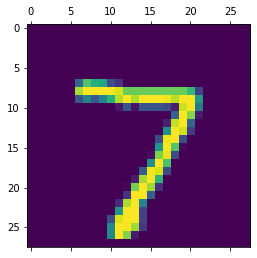

In [608]:
plt.matshow(X_test[0])

In [609]:
y_predicted = model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 884us/step


In [63]:
y_predicted[0]
# Displays the probability score for each class label. 

array([1.0004911e-01, 1.8262267e-03, 1.9984832e-01, 9.9306405e-01,
       7.8678140e-06, 5.6786299e-02, 1.8056544e-06, 9.9999869e-01,
       4.3653762e-01, 4.6398658e-01], dtype=float32)

In [64]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [65]:
y_predicted[:5]

array([[1.0004911e-01, 1.8262267e-03, 1.9984832e-01, 9.9306405e-01,
        7.8678140e-06, 5.6786299e-02, 1.8056544e-06, 9.9999869e-01,
        4.3653762e-01, 4.6398658e-01],
       [3.5234094e-03, 8.6605072e-01, 9.9999726e-01, 9.9342388e-01,
        1.2409489e-10, 4.8146451e-01, 3.8505495e-03, 1.8282478e-06,
        8.6112589e-01, 1.4091442e-07],
       [4.1994452e-04, 9.9706542e-01, 2.2127745e-01, 4.4714242e-02,
        1.7070711e-02, 3.4771860e-03, 8.4775090e-03, 2.3177141e-01,
        1.7130309e-01, 2.7160048e-03],
       [9.9997437e-01, 5.7680850e-06, 9.1143566e-01, 7.5162351e-03,
        1.1362774e-05, 4.0780783e-02, 6.9209534e-01, 7.9200798e-01,
        1.5428960e-02, 1.0488731e-01],
       [4.1146874e-03, 2.7437938e-05, 1.9890279e-02, 2.3822784e-03,
        9.9962533e-01, 4.3750554e-02, 1.1046550e-01, 7.4856889e-01,
        4.1398376e-02, 9.7764587e-01]], dtype=float32)

In [66]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    1,    1,    2,    3,    1,    3,    1],
       [   0, 1123,    2,    1,    0,    1,    3,    0,    5,    0],
       [   2,    4,  996,    3,    2,    0,    2,   14,    9,    0],
       [   0,    1,    3,  989,    0,    1,    0,    5,    9,    2],
       [   1,    0,    3,    1,  953,    1,    7,    3,    2,   11],
       [   4,    0,    0,   13,    1,  848,    5,    3,   13,    5],
       [   7,    2,    4,    1,    4,    5,  927,    3,    5,    0],
       [   0,    5,    7,    3,    1,    0,    0, 1005,    2,    5],
       [   4,    1,    1,    5,    3,    4,    1,    6,  948,    1],
       [   2,    4,    0,    6,   10,    7,    0,   15,    7,  958]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

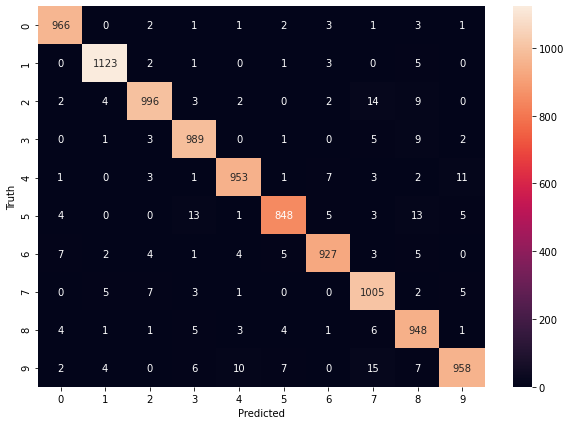

In [68]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4 style='color:purple'>3. NN model with two hidden layers</h4> 

Adding layers should improve the performance

<img src="Figures/model3.png" height=400 width=400/>

Include flattening layer instead of manual flattening

###### Model configuration

In [69]:
model3 = keras.Sequential([
    # input layer with 784 neurons 
    keras.layers.Flatten(input_shape=(28,28)),
    # first hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # second hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # Output layer with 10 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

##### Model summary

In [70]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [71]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [72]:
X_train_Norm = X_train / 255
X_test_Norm = X_test / 255
# we did not flatten separately

In [73]:
model3.fit(X_train_Norm, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2704 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.1208 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.0867 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.0689 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.0573 - accuracy: 0.9819


###### Testing the model

In [74]:
model3.evaluate(X_test_Norm, y_test)

313/313 [==============================] - 0s 794us/step - loss: 0.0901 - accuracy: 0.9724


[0.09009121358394623, 0.9724000096321106]

In [75]:
y_predicted = model3.predict(X_test_Norm)

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [76]:
y_predicted[:5]

array([[4.8409432e-02, 2.3420632e-02, 8.2410544e-01, 9.6585333e-01,
        1.2576742e-06, 1.2318134e-02, 5.3728657e-09, 9.9998569e-01,
        1.1969596e-02, 7.9266727e-01],
       [1.9751489e-03, 8.8835573e-01, 9.9996394e-01, 2.0857847e-01,
        4.0018559e-04, 8.1849098e-04, 6.2271953e-04, 3.5022309e-05,
        5.0367737e-01, 2.1425188e-03],
       [3.5006702e-03, 9.9972224e-01, 7.5082153e-02, 1.8882513e-02,
        2.9483777e-01, 3.1679869e-04, 1.1776835e-02, 3.8830096e-01,
        4.1947243e-01, 2.0765364e-03],
       [9.9999970e-01, 1.3075173e-03, 7.3896748e-01, 3.1749606e-03,
        6.0856342e-04, 7.8060031e-03, 6.4804780e-01, 1.0627979e-01,
        2.1030247e-02, 4.6364248e-01],
       [2.1297157e-02, 3.5530329e-04, 8.1126362e-02, 5.8370829e-03,
        9.9994004e-01, 2.5434285e-02, 5.2351058e-03, 1.1466497e-01,
        2.9408246e-02, 9.9024427e-01]], dtype=float32)

In [77]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [78]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    1,    1,    2,    0,    1,    1],
       [   0, 1122,    3,    0,    0,    1,    2,    1,    6,    0],
       [   7,    2, 1007,    0,    5,    0,    3,    3,    4,    1],
       [   0,    1,    9,  973,    1,    7,    0,    3,   12,    4],
       [   4,    1,    1,    1,  944,    0,    9,    2,    2,   18],
       [   3,    0,    0,    5,    2,  862,    6,    0,   13,    1],
       [   5,    3,    1,    0,    4,    2,  939,    0,    4,    0],
       [   1,    8,   17,    4,    1,    0,    0,  965,    4,   28],
       [   2,    1,    4,    3,    0,    1,    2,    2,  957,    2],
       [   3,    5,    0,    3,    3,    2,    1,    0,    9,  983]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

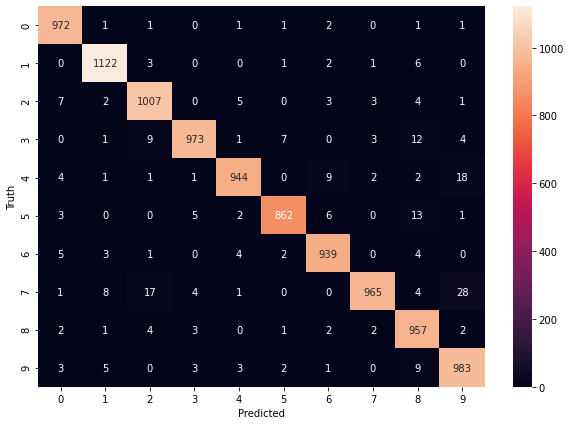

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<ipython-input-361-098b9115a3fd>:2: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)
<ipython-input-361-098b9115a3fd>:4: RuntimeWarning: divide by zero encountered in log
  y3 = -np.log(1-x)


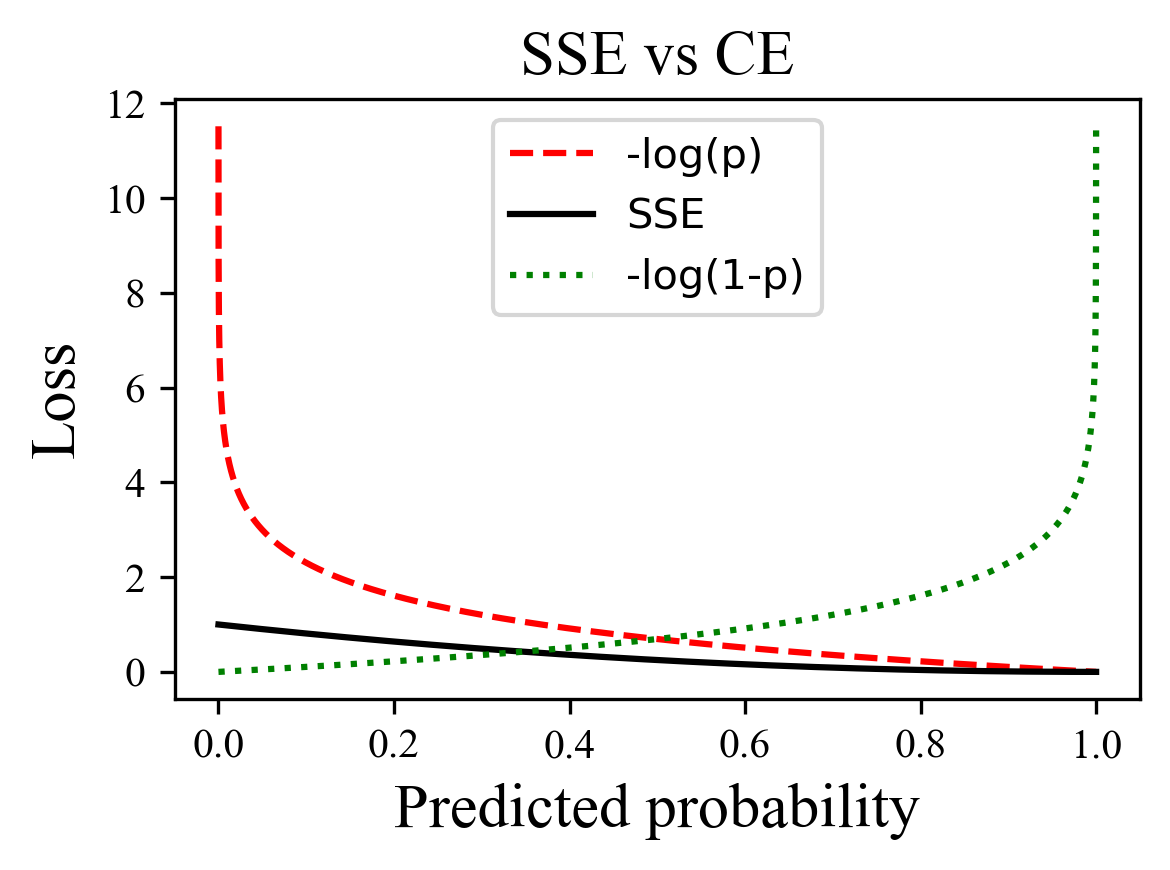

In [361]:
x = np.linspace(0, 1, 100000)
y1 = -np.log(x) 
y2 = (1-x)**2
y3 = -np.log(1-x) 
plt.figure(figsize = (4,3), dpi = 300)
plt.plot(x,y1,"r--",label='-log(p)')
plt.plot(x,y2,"k-",label='SSE')
plt.plot(x,y3,"g:",label='-log(1-p)')
plt.ylabel("Loss",fontdict={'fontname':'Times New Roman', 'fontsize':15})
plt.xlabel("Predicted probability",fontdict={'fontname':'Times New Roman', 'fontsize':15})
plt.title("SSE vs CE",fontdict={'fontname':'Times New Roman', 'fontsize':15})
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')
plt.tight_layout()
plt.legend()
plt.savefig("graph.png",bbox_inches='tight',dpi=(300)) 
plt.show()